In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

#Load iris
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" 
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df.head()
#Standardize the Data mean o variance 1
features=['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y= df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)
#print data after standarization
pd.DataFrame(data = x, columns = features).head()


#pca = PCA (n_components=2)
lda = LinearDiscriminantAnalysis()
LDAComponents = lda.fit_transform(x, y)
LDADf = pd.DataFrame(data = LDAComponents, columns = ['LDA component 1', 'LDA component 2'])
LDADf.head (5)

c:\Users\maixa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,LDA component 1,LDA component 2
0,8.084953,-0.328454
1,7.147163,0.755473
2,7.511378,0.238078
3,6.837676,0.642885
4,8.157814,-0.540639


In [27]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [28]:
finalDf = pd.concat([LDADf, df[['target']]], axis = 1) 
finalDf.head(5)

,LDA component 1,LDA component 2,target
0,8.084953,-0.328454,Iris-setosa
1,7.147163,0.755473,Iris-setosa
2,7.511378,0.238078,Iris-setosa
3,6.837676,0.642885,Iris-setosa
4,8.157814,-0.540639,Iris-setosa


AttributeError: PathCollection.set() got an unexpected keyword argument 'S'

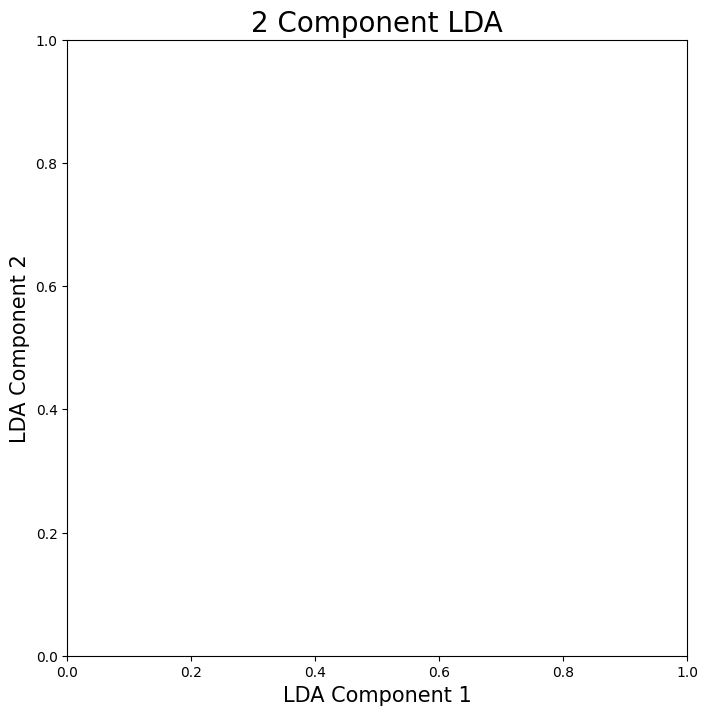

In [29]:
#Visualize 2D Projection
fig = plt.figure(figsize = (8,8))
ax= fig.add_subplot(1,1,1)
ax.set_xlabel('LDA Component 1', fontsize= 15) 
ax.set_ylabel('LDA Component 2', fontsize= 15) 
ax.set_title('2 Component LDA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'LDA component 1']
        , finalDf.loc[indicesToKeep, 'LDA component 2']
        , c = color
        , S = 50)
ax.legend (targets)
ax.grid()
#The explained variance tells us how much information (variance) can be attributed to each of the principal components
lda.explained_variance_ratio_
#Together, the first two principal components contain 95.80% of the information.
#The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance #The third and fourth principal component contained the rest of the variance of the dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def run_randomForest (X_train,X_test,y_train,y_test):
    clf=RandomForestClassifier (n_estimators=100, random_state=0,n_jobs=-1) 
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ') 
    print(accuracy_score(y_test,y_pred))

In [ ]:
%%time
run_randomForest(X_train_pca,X_test_pca, y_train, y_test) 

NameError: name 'run_randomForest' is not defined